<div style="text-align:center">
<h1>Neural Network in Python from Scratch</h1>
<hr>
<h3>Using Tensorflow</h3>
</div>
<hr>

__Regression Problem__:

We have a product whose price is calculated based on its lenght. We need to train our Neural Network to predict the price of the product when given its lenght.

In [11]:
### Setup

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import cProfile
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
tf.executing_eagerly()

True

### Creating Dataset

Let's assume we know that price of the product can be calculated using equation

__price = 3 * length of product + 2__

Below we will be creating dataset for our neural  network.

We will randomly generate lenght of product and then calculate the price using the above equation.
Also we will add some noise to it.

Then we will randomly initilize weights and bais for our netwwork.

__Work for our network is learn the correct weight (3) and bais (2) while training itself on created dataset.__

In [12]:
NUM_DATA_POINTS = 2000
training_inputs = tf.random.normal([NUM_DATA_POINTS])
noise = tf.random.normal([NUM_DATA_POINTS])
training_outputs = 3 * training_inputs + 2 + noise

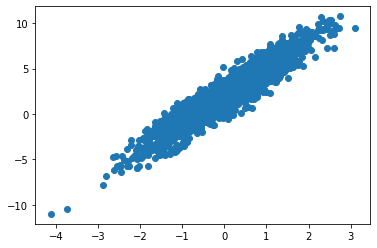

In [13]:
# Ploting our Dataset
plt.scatter(training_inputs,training_outputs)

In [37]:
# Creating a Neural  Network

class Linear(tf.keras.Model):
  def __init__(self):
    super(Linear, self).__init__()
    
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
    
  def call(self, inputs):
    return inputs * self.W + self.B

# The loss function to be optimized
def loss(model, inputs, targets):
    error = model(inputs) - targets
    return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

In [38]:
training_inputs

<tf.Tensor: id=169, shape=(2000,), dtype=float32, numpy=
array([ 1.2120494 ,  1.4917872 ,  0.15794145, ..., -0.4378564 ,
       -1.2235225 , -0.94536406], dtype=float32)>

In [39]:
model = Linear()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

steps = 300
for i in range(steps):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

Initial loss: 69.479
Loss at step 000: 66.762
Loss at step 020: 30.267
Loss at step 040: 14.031
Loss at step 060: 6.808
Loss at step 080: 3.595
Loss at step 100: 2.166
Loss at step 120: 1.530
Loss at step 140: 1.247
Loss at step 160: 1.121
Loss at step 180: 1.065
Loss at step 200: 1.040
Loss at step 220: 1.029
Loss at step 240: 1.024
Loss at step 260: 1.022
Loss at step 280: 1.021


In [35]:
print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

(2000,) (2000,)
Final loss: 1.021


In [36]:
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))

W = 3.00897216796875, B = 1.9984804391860962
